In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pycaret-exo-data/train_data_temp.csv
/kaggle/input/exop-data/yn_train.npy
/kaggle/input/exop-data/xn_train.npy
/kaggle/input/exo-data/testing.npy
/kaggle/input/exo-data/error_bars.npy
/kaggle/input/exo-data/training.npy
/kaggle/input/exo-data/wavelength.npy
/kaggle/input/exo-data/WASP12b.npy


### Tuning Extra Tree Regressor 

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Using cached importlib_metadata-6.4.1-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 23.1 MB/s eta 0:

In [3]:
from pycaret.regression import *
import pandas as pd

In [4]:
data = np.load("/kaggle/input/exo-data/training.npy")
data2 = np.load("/kaggle/input/exo-data/testing.npy")
pred_data = np.load("/kaggle/input/exo-data/WASP12b.npy")


In [5]:
data1 = data[:,:14]
df1 = pd.DataFrame(data1)
data3 = data2[:,:14]
testdata = pd.DataFrame(data3)
new_data = pd.DataFrame(pred_data)

In [6]:
s = setup(data = df1, train_size = 1.0 , test_data = testdata, target='13', session_id = 123, use_gpu=True, 
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,13
2,Target type,Regression
3,Original data shape,"(100000, 14)"
4,Transformed data shape,"(140002, 14)"
5,Transformed train set shape,"(100000, 14)"
6,Transformed test set shape,"(40002, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [7]:
xgboost = create_model('xgboost', fold=10,return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

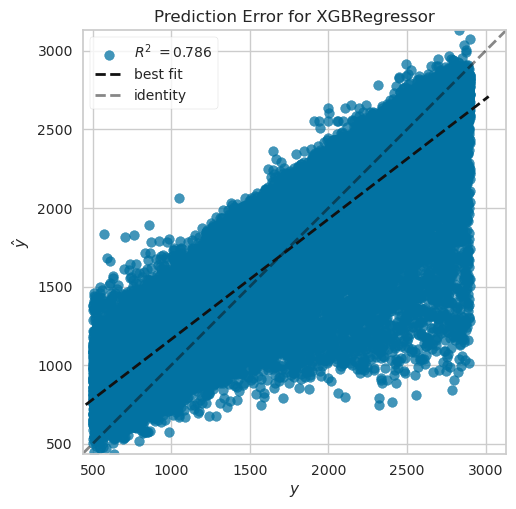

In [8]:
plot_model(xgboost , plot = 'error' ,use_train_data = False)

In [9]:
tuned_xgboost, tuner = tune_model(xgboost, return_tuner=True, n_iter = 500 , return_train_score=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


In [10]:
tuned_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=230,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0.2, reg_lambda=2, ...)

In [11]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                                                                          '7',
                                                                          '8',
                                                                   

In [12]:
et = create_model('et', fold=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,229.2550,120228.7748,346.7402,0.7509,0.2494,0.1763
1,229.2631,116737.9686,341.6694,0.7560,0.2448,0.1748
2,227.2434,116190.7449,340.8676,0.7586,0.2490,0.1758
3,225.1487,113423.2493,336.7837,0.7626,0.2423,0.1714
4,226.8273,117528.1764,342.8238,0.7594,0.2492,0.1768
5,227.3835,117538.5629,342.8390,0.7582,0.2462,0.1735
6,227.6511,116612.8037,341.4862,0.7569,0.2456,0.1729
7,235.7679,126914.5708,356.2507,0.7350,0.2553,0.1805
8,227.0614,115869.9059,340.3967,0.7578,0.2486,0.1766


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

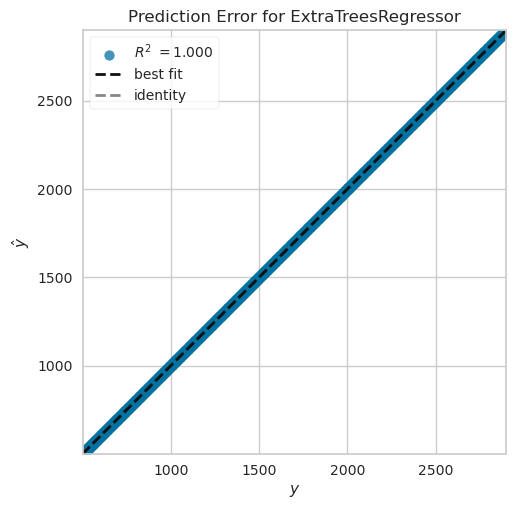

In [13]:
plot_model(et , plot = 'error' ,use_train_data = False)

In [14]:
#catboost = create_model('catboost', fold=10)

In [15]:
#plot_model(catboost , plot = 'error' ,use_train_data = False)

In [16]:
#tuned_catboost, tunerc = tune_model(catboost, return_tuner=True, n_iter = 100 , return_train_score=True)

In [17]:
#tuned_catboost

In [18]:
#tunerc

In [19]:
#plot_model(tuned_catboost , plot = 'error' ,use_train_data = False)

In [20]:
predictions_xg = predict_model(xgboost, data=new_data)

In [21]:
predictions_xg

,0,1,2,3,4,5,6,7,8,9,10,11,12,prediction_label
0,1.4441,1.4422,1.4402,1.4428,1.4391,1.4386,1.4365,1.4327,1.4582,1.46,1.453,1.4475,1.4332,1083.050415


In [22]:
predictions_tunedxg = predict_model(tuned_xgboost, data=new_data)

In [23]:
predictions_tunedxg

,0,1,2,3,4,5,6,7,8,9,10,11,12,prediction_label
0,1.4441,1.4422,1.4402,1.4428,1.4391,1.4386,1.4365,1.4327,1.4582,1.46,1.453,1.4475,1.4332,1104.530029


In [24]:
#predictions_cat= predict_model(catboost, data=new_data)

In [25]:
#predictions_tunedcat = predict_model(tuned_catboost, data=new_data)

In [26]:
predictions_et = predict_model(et, data=new_data)

In [27]:
predictions_et

,0,1,2,3,4,5,6,7,8,9,10,11,12,prediction_label
0,1.4441,1.4422,1.4402,1.4428,1.4391,1.4386,1.4365,1.4327,1.4582,1.46,1.453,1.4475,1.4332,1058.562364


In [28]:
#best = compare_models(fold=5)

In [29]:
#plot_model(best, plot = 'residuals')

In [30]:
print(et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [31]:
print(xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, ...)


In [32]:
print(tuned_xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=230,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0.2, reg_lambda=2, ...)


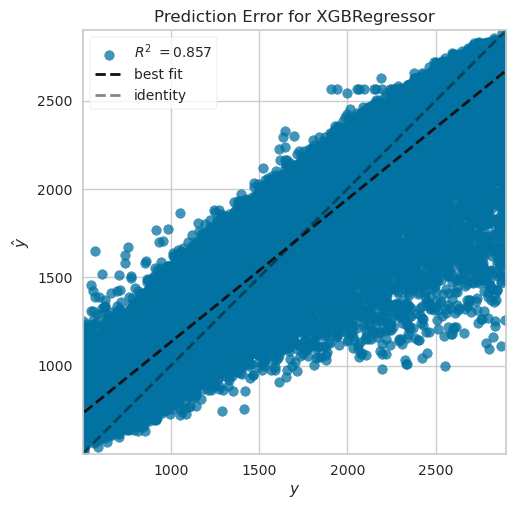

In [33]:
plot_model(tuned_xgboost , plot = 'error' ,use_train_data = False)

In [34]:
save_model(xgboost, 'xgboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxSc...
                               gamma=0, gpu_id=0, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monoto

In [35]:
save_model(tuned_xgboost, 'tuned_xgboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxSc...
                               gamma=0, gpu_id=0, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=11, max_leaves=0, min_child_weight=3,
                               missing=nan, monotone_con

In [36]:
#save_model(catboost, 'catboost_model')

In [37]:
#save_model(tuned_catboost, 'tuned_catboost_model')

In [38]:
save_model(et,"extra_tree_reg")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'extra_tree_reg.pkl')

In [39]:
#plot_model(et , plot = 'error' ,use_train_data = False)

In [40]:
#loaded_model_cat = load_model('tuned_catboost_model')
#print(loaded_model_cat)

In [41]:
loaded_model_xg = load_model('tuned_xgboost_model')
print(loaded_model_xg)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxSc...
                              gamma=0, gpu_id=0, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.05, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=11, max_leaves=0, min_child_weight=3,
                

In [42]:
loaded_model_et = load_model('et')
print(loaded_model_et)

FileNotFoundError: [Errno 2] No such file or directory: 'et.pkl'

In [ ]:
#plot_model(rf , plot = 'error' ,use_train_data = False)

In [ ]:
#plot_model(rf , plot = 'error')

In [ ]:
# tune hyperparameters of dt
#tuned_rf = tune_model(rf ,fold=3,n_iter=5)

In [ ]:
#tuned_et, tuner = tune_model(et, return_tuner=True)


In [ ]:
#tuned_et

In [ ]:
#tuner